# Example Notebook for Correcting and loading FastCCD Images

This example reads data from teh FastCCD and corrects and rotates the images

Load the ``databroker`` moudle

In [22]:
import numpy as np
from databroker import DataBroker, get_table
from csxtools import get_fastccd_images
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider, interact

Load the headers without the images (using ``fill=False``)

In [23]:
bgnd = DataBroker['ce5042b7-00ae-49ca-9b11-b10c5661aaaa'] #[52440]
get_table(bgnd, fill=False)

,time,fccd_stats_total5,pgm_energy,npty,sclr_chan3,sx,ring_curr,fccd_stats_total2,sclr_chan8,epu2_phase,...,fccd_acquire_period,eta,fccd_acquire_time,sclr_time,fccd_image_lightfield,delta,fccd_stats_total1,npbx,slt1_yg,theta
1,2015-10-22 00:10:38.185091-04:00,3232285349,929.897551,-26.662465,296504,6.899999,150.056366,2871992040,0,-0.000408,...,1,-0.017207,0.1,8.000000e-08,7180b59d-5112-428e-b6a4-9bc8893220b0,38.999985,137150246,-3.380105,7.0003,19.499985


In [24]:
data = DataBroker['b2596f8e-d220-4aea-8a55-8ccb17cbdacc'] #[52436]
get_table(data, fill=False)

,time,fccd_stats_total5,pgm_energy,npty,sclr_chan3,sx,ring_curr,fccd_stats_total2,sclr_chan8,epu2_phase,...,fccd_acquire_period,eta,fccd_acquire_time,sclr_time,fccd_image_lightfield,delta,fccd_stats_total1,npbx,slt1_yg,theta
1,2015-10-21 23:59:54.531477-04:00,3234474684,929.879892,-26.66246,296411,6.899999,150.018917,2873875362,0,-0.000403,...,1,-0.017207,0.1,8.000000e-08,20eed5d8-05e2-4b0e-bd3c-5edae7b15878,38.999985,137233260,-3.38011,7.0003,19.499985


Now correct the CCD images, using only a single background image. 

In the future this should be taken from the metadata associated with the data, or from the darkfield entry

In [25]:
images = get_fastccd_images(data, (bgnd, None, None))

In [34]:
def browse_frames(images, minmax):
    n = images.shape[0]
    def view_frame(i, vmin, vmax): 
        plt.figure(figsize=(16,16))
        plt.imshow(images[i], cmap='hot', interpolation='none', vmin=vmin, vmax=vmax)
        plt.title('Frame {} Min = {} Max = {}'.format(i, vmin, vmax))
        plt.show()
    interact(view_frame, i=(0, n-1), vmin=minmax, vmax=minmax)

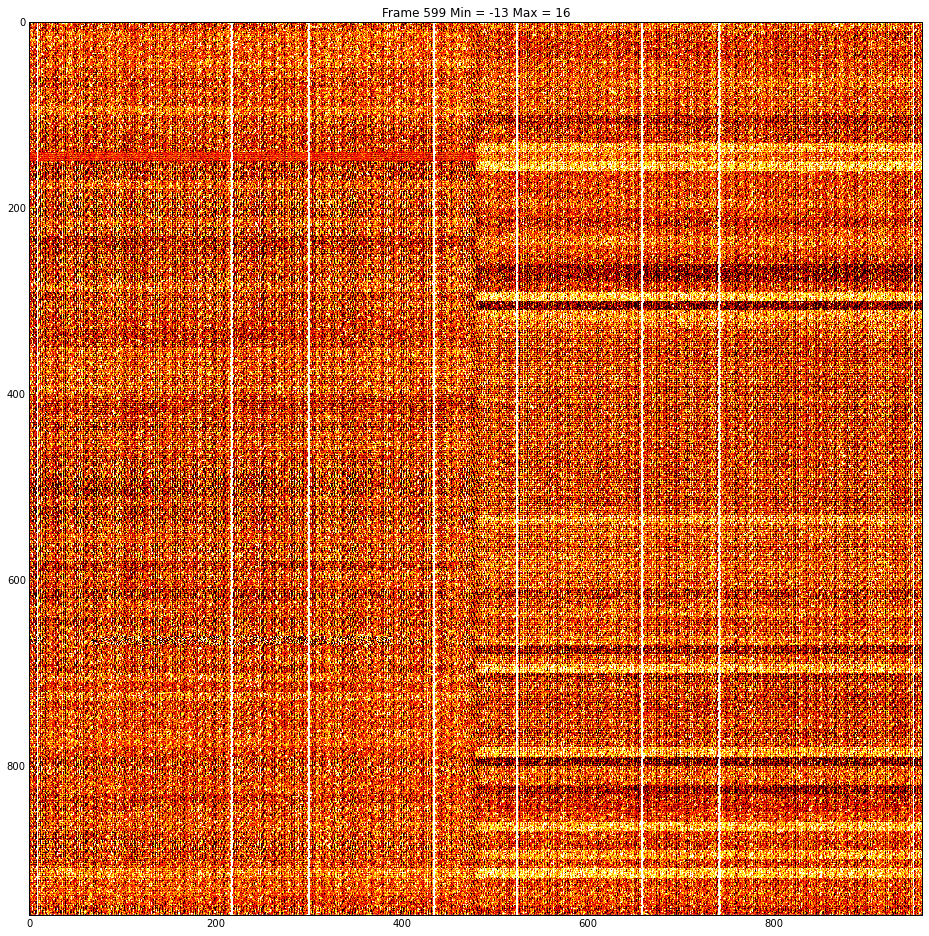

In [35]:
browse_frames(images, (-20, 20))